In [77]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from snorkel import SnorkelSession
session = SnorkelSession()

import os
from snorkel.parser import XMLMultiDocPreprocessor

# The following line is for testing only. Feel free to ignore it.

file_path = 'articles/training.xml'
train_preprocessor = XMLMultiDocPreprocessor(
    path=file_path,
    doc='.//article',
    text='.//front/article-meta/abstract/p/text()',
    id=  './/front/article-meta/article-id/text()'
)

file_path = 'articles/development.xml'
dev_preprocessor = XMLMultiDocPreprocessor(
    path=file_path,    
    doc='.//document',    
    text='.//passage/text/text()',    
    id='.//id/text()'
)

file_path = 'articles/testcorpus.xml'
test_preprocessor = XMLMultiDocPreprocessor(
    path=file_path,    
    doc='.//document',    
    text='.//passage/text/text()',    
    id='.//id/text()'
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from snorkel.parser import CorpusParser

corpus_parser = CorpusParser()
corpus_parser.apply(list(train_preprocessor)) #parallelism can be run with a Postgres DBMS, but not SQLite
corpus_parser.apply(list(dev_preprocessor), clear=False)
corpus_parser.apply(list(test_preprocessor), clear=False)

In [78]:
from six.moves.cPickle import load
from snorkel.models import Document, Sentence
import cPickle

with open('articles/doc_ids.pkl', 'rb') as f:
    train_ids, dev_ids, test_ids = load(f)
train_ids, dev_ids, test_ids = set(train_ids), set(dev_ids), set(test_ids)
print len(train_ids)
print len(dev_ids)
print len(test_ids)
train_sents, dev_sents, test_sents = set(), set(), set()
docs = session.query(Document).order_by(Document.name).all()
print docs
print len(docs)
for i, doc in enumerate(docs):
    for s in doc.sentences:
        if doc.name in train_ids:
            train_sents.add(s)
        elif doc.name in dev_ids:
            dev_sents.add(s)
        elif doc.name in test_ids:
            test_sents.add(s)
        else:
            raise Exception('ID <{0}> not found in any id set'.format(doc.name))

1905
160
30
[Document 21087800, Document 21231269, Document 21993267, Document 22244735, Document 22591752, Document 22660328, Document 23426447, Document 23710160, Document 23774980, Document 24926620, Document 24946761, Document 25404199, Document 25524716, Document 25569616, Document 25625824, Document 25656872, Document 25971098, Document 26206605, Document 26245740, Document 26335740, Document 26419597, Document 26649857, Document 26699378, Document 26729362, Document 26767526, Document 26778574, Document 26900040, Document 26980008, Document 26987530, Document 27031869, Document 27154659, Document 27177653, Document 27191652, Document 27313000, Document 27329598, Document 27329599, Document 27385000, Document 27409165, Document 27409345, Document 27418145, Document 27421140, Document 27429196, Document 27429198, Document 27447560, Document 27447743, Document 27447744, Document 27447749, Document 27447860, Document 27447861, Document 27448961, Document 27462774, Document 27462775,

In [83]:
from snorkel.models import Candidate, candidate_subclass

BiomarkerMedium = candidate_subclass('BiomarkerMedium', ['biomarker', 'medium'])

from snorkel.models import candidate_subclass
from snorkel.candidates import Ngrams, CandidateExtractor
from snorkel.matchers import PersonMatcher
import matchers
from snorkel.models import Document
from snorkel.viewer import SentenceNgramViewer
import os

biomarker_ngrams = Ngrams(n_max=1)
medium_ngrams = Ngrams(n_max=5)

# Create our two Matchers
bMatcher = matchers.getBiomarkerMatcher()
mMatcher = matchers.getMediumMatcher()
    
# Building the CandidateExtractor 
candidate_extractor = CandidateExtractor(BiomarkerMedium, [biomarker_ngrams, medium_ngrams], [bMatcher, mMatcher])


In [84]:
for k, sents in enumerate([train_sents, dev_sents, test_sents]):
    candidate_extractor.apply(sents, split=k)
    print("Number of candidates:", session.query(BiomarkerMedium).filter(BiomarkerMedium.split == k).count())
dev_cands = session.query(BiomarkerMedium).filter(BiomarkerMedium.split == 1).all()
for c in dev_cands:
    print c

Clearing existing...
Running UDF...
[========================================] 100%%

('Number of candidates:', 1742)
Clearing existing...
Running UDF...
[========================================] 100%%

('Number of candidates:', 423)
Clearing existing...
Running UDF...
[========================================] 100%%

('Number of candidates:', 58)
BiomarkerMedium(Span("SAM", sentence=14071, chars=[103,105], words=[19,19]), Span("serum", sentence=14071, chars=[18,22], words=[4,4]))
BiomarkerMedium(Span("GOLPH3L", sentence=14496, chars=[86,92], words=[13,13]), Span("cell", sentence=14496, chars=[115,118], words=[17,17]))
BiomarkerMedium(Span("SCD", sentence=14565, chars=[136,138], words=[18,18]), Span("cell", sentence=14565, chars=[104,107], words=[14,14]))
BiomarkerMedium(Span("T", sentence=14565, chars=[102,102], words=[13,13]), Span("cell", sentence=14565, chars=[104,107], words=[14,14]))
BiomarkerMedium(Span("CONCLUSION", sentence=13345, chars=[0,9], words=[0,0]), Span("blood", sent

BiomarkerMedium(Span("PCB", sentence=14076, chars=[0,2], words=[0,0]), Span("serum", sentence=14076, chars=[33,37], words=[6,6]))
BiomarkerMedium(Span("USA", sentence=14076, chars=[182,184], words=[34,34]), Span("serum", sentence=14076, chars=[33,37], words=[6,6]))
BiomarkerMedium(Span("ADC", sentence=13819, chars=[105,107], words=[16,16]), Span("cell", sentence=13819, chars=[150,153], words=[25,25]))
BiomarkerMedium(Span("PTEN", sentence=13819, chars=[39,42], words=[5,5]), Span("cell", sentence=13819, chars=[150,153], words=[25,25]))
BiomarkerMedium(Span("CONCLUSION", sentence=13820, chars=[0,9], words=[0,0]), Span("cell", sentence=13820, chars=[101,104], words=[16,16]))
BiomarkerMedium(Span("ADC", sentence=13820, chars=[148,150], words=[24,24]), Span("cell", sentence=13820, chars=[101,104], words=[16,16]))
BiomarkerMedium(Span("PTEN", sentence=13820, chars=[20,23], words=[4,4]), Span("cell", sentence=13820, chars=[101,104], words=[16,16]))
BiomarkerMedium(Span("T", sentence=14828, ch

BiomarkerMedium(Span("CD3", sentence=14016, chars=[56,58], words=[9,9]), Span("cell", sentence=14016, chars=[165,168], words=[32,32]))
BiomarkerMedium(Span("GIT2KO", sentence=14901, chars=[140,145], words=[22,22]), Span("cell", sentence=14901, chars=[8,11], words=[1,1]))
BiomarkerMedium(Span("HCC", sentence=14922, chars=[186,188], words=[33,33]), Span("serum", sentence=14922, chars=[55,59], words=[10,10]))
BiomarkerMedium(Span("OS", sentence=14922, chars=[124,125], words=[19,19]), Span("serum", sentence=14922, chars=[55,59], words=[10,10]))
BiomarkerMedium(Span("HBV", sentence=14922, chars=[164,166], words=[28,28]), Span("serum", sentence=14922, chars=[55,59], words=[10,10]))
BiomarkerMedium(Span("GAD", sentence=14188, chars=[70,72], words=[12,12]), Span("serum", sentence=14188, chars=[18,22], words=[4,4]))
BiomarkerMedium(Span("RNA", sentence=14772, chars=[209,211], words=[33,33]), Span("cell", sentence=14772, chars=[69,72], words=[12,12]))
BiomarkerMedium(Span("UBC1", sentence=14772,

BiomarkerMedium(Span("eGFR", sentence=15004, chars=[27,30], words=[5,5]), Span("Serum", sentence=15004, chars=[0,4], words=[0,0]))
BiomarkerMedium(Span("eGFR", sentence=15007, chars=[164,167], words=[36,36]), Span("serum", sentence=15007, chars=[58,62], words=[7,7]))
BiomarkerMedium(Span("eGFR", sentence=15007, chars=[164,167], words=[36,36]), Span("serum", sentence=15007, chars=[95,99], words=[19,19]))
BiomarkerMedium(Span("HIV", sentence=15007, chars=[193,195], words=[47,47]), Span("serum", sentence=15007, chars=[58,62], words=[7,7]))
BiomarkerMedium(Span("HIV", sentence=15007, chars=[193,195], words=[47,47]), Span("serum", sentence=15007, chars=[95,99], words=[19,19]))
BiomarkerMedium(Span("GIT2KO", sentence=14900, chars=[67,72], words=[7,7]), Span("lymph", sentence=14900, chars=[74,78], words=[8,8]))
BiomarkerMedium(Span("GIT2KO", sentence=14900, chars=[67,72], words=[7,7]), Span("cell", sentence=14900, chars=[263,266], words=[45,45]))
BiomarkerMedium(Span("GIT2KO", sentence=14900,

BiomarkerMedium(Span("RESULTS", sentence=14256, chars=[0,6], words=[0,0]), Span("CSF", sentence=14256, chars=[57,59], words=[11,11]))
BiomarkerMedium(Span("NFL", sentence=14256, chars=[50,52], words=[9,9]), Span("CSF", sentence=14256, chars=[57,59], words=[11,11]))
BiomarkerMedium(Span("CRC", sentence=14773, chars=[71,73], words=[9,9]), Span("cell", sentence=14773, chars=[107,110], words=[16,16]))
BiomarkerMedium(Span("UBC1", sentence=14773, chars=[31,34], words=[4,4]), Span("cell", sentence=14773, chars=[107,110], words=[16,16]))
BiomarkerMedium(Span("CRC", sentence=14773, chars=[103,105], words=[15,15]), Span("cell", sentence=14773, chars=[107,110], words=[16,16]))
BiomarkerMedium(Span("CSF", sentence=13531, chars=[43,45], words=[7,7]), Span("cerebrospinal fluid", sentence=13531, chars=[22,40], words=[4,5]))
BiomarkerMedium(Span("ELISA", sentence=13531, chars=[205,209], words=[32,32]), Span("CSF", sentence=13531, chars=[43,45], words=[7,7]))
BiomarkerMedium(Span("ELISA", sentence=135

BiomarkerMedium(Span("TAS", sentence=14191, chars=[113,115], words=[20,20]), Span("Blood", sentence=14191, chars=[0,4], words=[0,0]))
BiomarkerMedium(Span("NAFLD", sentence=14792, chars=[174,178], words=[27,27]), Span("serum", sentence=14792, chars=[123,127], words=[19,19]))
BiomarkerMedium(Span("adiponectin", sentence=14792, chars=[153,163], words=[24,24]), Span("serum", sentence=14792, chars=[123,127], words=[19,19]))
BiomarkerMedium(Span("periostin", sentence=14792, chars=[139,147], words=[22,22]), Span("serum", sentence=14792, chars=[123,127], words=[19,19]))
BiomarkerMedium(Span("METHODS", sentence=15045, chars=[0,6], words=[0,0]), Span("cell", sentence=15045, chars=[114,117], words=[18,18]))
BiomarkerMedium(Span("HNSCC", sentence=14541, chars=[201,205], words=[30,30]), Span("cell", sentence=14541, chars=[185,188], words=[27,27]))
BiomarkerMedium(Span("T1", sentence=14932, chars=[211,212], words=[37,37]), Span("serum", sentence=14932, chars=[78,82], words=[11,11]))
BiomarkerMedium

BiomarkerMedium(Span("HS-CRP", sentence=13338, chars=[183,188], words=[31,31]), Span("cell", sentence=13338, chars=[45,48], words=[6,6]))
BiomarkerMedium(Span("HS-CRP", sentence=13338, chars=[183,188], words=[31,31]), Span("CSF", sentence=13338, chars=[343,345], words=[55,55]))
BiomarkerMedium(Span("HS-CRP", sentence=13338, chars=[183,188], words=[31,31]), Span("blood", sentence=13338, chars=[39,43], words=[5,5]))
BiomarkerMedium(Span("WBC", sentence=13338, chars=[57,59], words=[9,9]), Span("cell", sentence=13338, chars=[45,48], words=[6,6]))
BiomarkerMedium(Span("WBC", sentence=13338, chars=[57,59], words=[9,9]), Span("CSF", sentence=13338, chars=[343,345], words=[55,55]))
BiomarkerMedium(Span("WBC", sentence=13338, chars=[57,59], words=[9,9]), Span("blood", sentence=13338, chars=[39,43], words=[5,5]))
BiomarkerMedium(Span("GM-CSF", sentence=13338, chars=[340,345], words=[55,55]), Span("cell", sentence=13338, chars=[45,48], words=[6,6]))
BiomarkerMedium(Span("GM-CSF", sentence=13338, 

In [85]:
from candidate_adjective_fixer_medium import *
from specificityfixer import *
add_adj_candidate(session, BiomarkerMedium, dev_cands)
session.commit()

 added to serum
squamous cervical  added to cell
Checking Biomarker: 28261346::span:501:507
Checking Condition: 28261346::span:97:118
0
Couldn't find: 28261346::span:97:118
ADDING NEW CANDIDATE
t pathogenic  added to cell
Checking Biomarker: 28261322::span:1659:1661
Checking Condition: 28261322::span:91:107
0
Couldn't find: 28261322::span:91:107
ADDING NEW CANDIDATE
t pathogenic  added to cell
Checking Biomarker: 28261322::span:1625:1625
Checking Condition: 28261322::span:91:107
1
 added to blood
squamous cervical  added to cell
Checking Biomarker: 28261346::span:310:316
Checking Condition: 28261346::span:120:141
0
Couldn't find: 28261346::span:120:141
ADDING NEW CANDIDATE
squamous cervical  added to cell
Checking Biomarker: 28261346::span:370:376
Checking Condition: 28261346::span:120:141
1
 added to urine
 added to Urine
 added to urine
 added to Urine
 added to urine
 added to Urine
 added to urine
 added to Urine
 added to urine
 added to Urine
 added to urine
 added to Urine
alter

Checking Condition: 28261322::span:0:30
0
Couldn't find: 28261322::span:0:30
ADDING NEW CANDIDATE
 added to cerebrospinal fluid
 added to cerebrospinal fluid
 added to cerebrospinal fluid
 added to cerebrospinal fluid
baseline  added to serum
Checking Biomarker: 28260649::span:901:906
Checking Condition: 28260649::span:93:106
1
b other  added to cell
Checking Biomarker: 28262555::span:845:848
Checking Condition: 28262555::span:157:168
0
Couldn't find: 28262555::span:157:168
ADDING NEW CANDIDATE
b other  added to cell
Checking Biomarker: 28262555::span:797:799
Checking Condition: 28262555::span:157:168
1
b other  added to cell
Checking Biomarker: 28262555::span:850:854
Checking Condition: 28262555::span:157:168
1
b other  added to cell
Checking Biomarker: 28262555::span:793:795
Checking Condition: 28262555::span:157:168
1
altered  added to cell
Checking Biomarker: 28260693::span:2047:2052
Checking Condition: 28260693::span:0:11
0
Couldn't find: 28260693::span:0:11
ADDING NEW CANDIDATE
p

retroperitoneal robot-assisted  added to lymph
Checking Biomarker: 28262537::span:94:103
Checking Condition: 28262537::span:12:47
1
retroperitoneal robot-assisted  added to lymph
Checking Biomarker: 28262537::span:160:167
Checking Condition: 28262537::span:12:47
1
retroperitoneal robot-assisted  added to lymph
Checking Biomarker: 28262537::span:222:226
Checking Condition: 28262537::span:12:47
1
retroperitoneal robot-assisted  added to lymph
Checking Biomarker: 28262537::span:54:61
Checking Condition: 28262537::span:0:35
1
 added to cerebrospinal fluid
 added to cerebrospinal fluid
Finished Processing Existing Candidates


In [63]:
import re
#from snorkel.lf_terms import *
from snorkel.lf_helpers import  *
from snorkel.lf_helpers import get_sent_candidate_spans
from snorkel.lf_helpers import get_left_tokens, get_right_tokens
from random import randint
import cPickle
import unicodedata
from PyDictionary import PyDictionary
sentence_keyword_lemmas = ["contain", "collect", "find", "sample", "fluid", "tissue", "detection"]
sentences = []

knowAbbreviations = []
with open('databases/abbreviations.com.pkl', 'rb') as f:
    knowAbbreviations = cPickle.load(f)

# 1- distance far
def LF_distance_far(c):
    # print m.lemmas
    # print m.dep_labels
    x=0
    for thing in get_between_tokens(c):
        x+=1
    if x > 10:
        return -1
        
#2 - if the word has a colon after it its generally not a biomarker
def LF_colon(c):
    words_in_between = []
    for thing in get_between_tokens(c):
        words_in_between.append(thing)
    if(len(words_in_between) > 1 and words_in_between[0] == ":"):
        return -1

def LF_known_abs(c):
    if(c.biomarker.get_span() in knowAbbreviations):
        return -1

def LF_single_letter(c):
    if(len(c.biomarker.get_span()) < 2):
        return -1
    else:
        return 0
def LF_roman_numeral(c):
    biomarker = (c.biomarker.get_span())
    unicodedata.normalize('NFKD', biomarker).encode('ascii','ignore')
    if re.match(r'((?<=\s)|(?<=^))(M{1,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})|M{0,4}(CM|CD|D?C{1,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})|M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{1,3})(IX|IV|V?I{0,3})|M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{1,3}))(?=\s)',
                biomarker):
        return -1
    
with open('databases/common2000.pkl', 'rb') as f:
    common2000 = cPickle.load(f)

def LF_common_2000(c):
    if(c.biomarker.get_span() in common2000):
        return -1
def LF_same_thing(c):
    if(c.biomarker.get_span() == c.medium.get_span()):
        return -1
# # 2- distance close
# def LF_distance_close(m):
#     # print m.lemmas
#     # print m.dep_labels
#     distance = abs(m.e2_idxs[0] - m.e1_idxs[0])
#     if distance < 5:
#         return 1
#     else:
#         return 0

# # 3-  Biomarker + preposition + Medium
# def LF_IN(m):
#     return 1 if (('IN' in m.post_window1('poses', 5) and 'IN' in m.pre_window2('poses',5))) or (('IN' in m.post_window2('poses', 5) and 'IN' in m.pre_window1('poses',5))) else 0 
         
# # 4- If the sentence contains common keywords
# def LF_keyword(m):
#     for word in sentence_keyword_lemmas:
#         if (word in m.pre_window1('lemmas',20)) or (word in m.post_window1('lemmas',20)):
#             #if presenceOfNot(m):
#             #    return -1
#             #else:
#             #    return 1
#             return 1
#     return 0

# # 5- Medium "from" patients or subjects
# def LF_From(m):
#     index = 0
#     post = m.post_window2('lemmas',20)
#     if 'patient' in post:
#         index = post.index('patient')
#     elif 'subject' in post:
#         index = post.index('subject')
#     return 1 if "from" in m.post_window2('lemmas',index) else 0

# # 6- Medium "-based": blood-based biomarker
# def LF_based(m):
#     mediumBased = m.mention2(attribute='words') + "-based"
#     return 1 if mediumBased in m.pre_window1('words',20) or mediumBased in m.post_window1('words',20) else 0

# # 7- Medium "biomarker": blood biomarker
# def LF_biomarker(m):
#     return 1 if 'biomarker' in m.post_window2('lemmas',3) else 0

# # 8- if that relationship is in the references, MIGHT NOT WORK
# def LF_References(m):
#     sent_id = m.post_window1('sent_id',1)
#     sentences_before = sentences[0:sent_id]
#     for sentence in sentences_before:
#         if 'References' in sentence.words():
#             return -1
#     return 0

In [64]:
LFs = [LF_distance_far, LF_colon, LF_known_abs, LF_single_letter, LF_roman_numeral, LF_common_2000, LF_same_thing]

In [65]:
from snorkel.annotations import LabelAnnotator
labeler = LabelAnnotator(lfs=LFs)

In [66]:
%time L_train = labeler.apply(split=0)
L_train

Clearing existing...
Running UDF...
[========================================] 100%%

CPU times: user 4.31 s, sys: 48 ms, total: 4.36 s
Wall time: 4.32 s


<622x7 sparse matrix of type '<type 'numpy.int64'>'
	with 319 stored elements in Compressed Sparse Row format>

In [67]:
L_train.lf_stats(session)

,j,Coverage,Overlaps,Conflicts
LF_distance_far,0,0.451768,0.019293,0.0
LF_colon,1,0.001608,0.000000,0.0
LF_known_abs,2,0.045016,0.012862,0.0
LF_single_letter,3,0.014469,0.006431,0.0
LF_roman_numeral,4,0.000000,0.000000,0.0
LF_common_2000,5,0.000000,0.000000,0.0
LF_same_thing,6,0.000000,0.000000,0.0


In [68]:
from snorkel.learning.structure import DependencySelector
ds = DependencySelector()
deps = ds.select(L_train, threshold=0.1)
len(deps)

15

In [69]:
deps

{(1, 2, 0),
 (1, 3, 0),
 (1, 4, 0),
 (1, 5, 0),
 (1, 6, 0),
 (2, 3, 0),
 (2, 4, 0),
 (2, 5, 0),
 (2, 6, 0),
 (3, 4, 0),
 (3, 5, 0),
 (3, 6, 0),
 (4, 5, 0),
 (4, 6, 0),
 (5, 6, 0)}

In [70]:
deps = set()

In [71]:
from snorkel.learning import GenerativeModel

gen_model = GenerativeModel(lf_propensity=True)
gen_model.train(
    L_train, deps=deps, decay=0.95, step_size=0.1/L_train.shape[0], reg_param=0.0
)

Inferred cardinality: 2


In [72]:
train_marginals = gen_model.marginals(L_train)

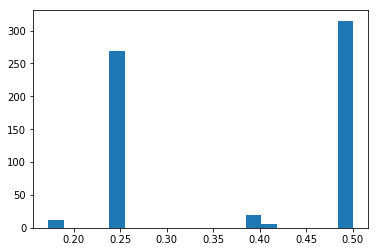

In [73]:
import matplotlib.pyplot as plt
plt.hist(train_marginals, bins=20)
plt.show()

In [74]:
gen_model.learned_lf_stats()

,Accuracy,Coverage,Precision,Recall
0,0.750242,0.6202,0.748131,0.462993
1,0.586253,0.4510,0.585941,0.259855
2,0.603008,0.4655,0.602509,0.280169
3,0.592658,0.4522,0.599648,0.274135
4,0.581546,0.4476,0.574610,0.259453
5,0.588091,0.4484,0.589464,0.261062
6,0.585360,0.4440,0.589278,0.260861


In [75]:
from snorkel.annotations import save_marginals
save_marginals(session, L_train, train_marginals)

Saved 622 marginals


In [76]:
from load_external_annotations_new import load_external_labels
load_external_labels(session, BiomarkerMedium, 'Biomarker', 'Medium', 'articles/medium_gold_labels.tsv', dev_cands, annotator_name='gold')

28263741::span:987:990
28263741::span:1140:1158
BiomarkerMedium(Span("DCAD", sentence=13491, chars=[77,80], words=[9,9]), Span("cerebrospinal fluid", sentence=13491, chars=[230,248], words=[28,29]))
28263741::span:1196:1199
28263741::span:1140:1158
BiomarkerMedium(Span("14.1", sentence=13491, chars=[286,289], words=[42,42]), Span("cerebrospinal fluid", sentence=13491, chars=[230,248], words=[28,29]))
28263753::span:2355:2364
28263753::span:2371:2376
BiomarkerMedium(Span("CONCLUSION", sentence=13476, chars=[0,9], words=[0,0]), Span("plasma", sentence=13476, chars=[16,21], words=[3,3]))
28261965::span:1160:1166
28261965::span:1192:1194
BiomarkerMedium(Span("RESULTS", sentence=14233, chars=[0,6], words=[0,0]), Span("CSF", sentence=14233, chars=[32,34], words=[6,6]))
28263753::span:113:121
28263753::span:195:200
BiomarkerMedium(Span("OBJECTIVE", sentence=13467, chars=[0,8], words=[0,0]), Span("plasma", sentence=13467, chars=[82,87], words=[11,11]))
28261284::span:964:968
28261284::span:918

28261960::span:666:670
28261960::span:876:878
BiomarkerMedium(Span("CXCL8", sentence=14254, chars=[338,342], words=[50,50]), Span("CSF", sentence=14254, chars=[548,550], words=[85,85]))
28261960::span:666:670
28261960::span:399:417
BiomarkerMedium(Span("CXCL8", sentence=14254, chars=[338,342], words=[50,50]), Span("cerebrospinal fluid", sentence=14254, chars=[71,89], words=[8,9]))
28261960::span:666:670
28261960::span:420:422
BiomarkerMedium(Span("CXCL8", sentence=14254, chars=[338,342], words=[50,50]), Span("CSF", sentence=14254, chars=[92,94], words=[11,11]))
28261960::span:876:878
28261960::span:399:417
BiomarkerMedium(Span("CSF", sentence=14254, chars=[548,550], words=[85,85]), Span("cerebrospinal fluid", sentence=14254, chars=[71,89], words=[8,9]))
28261960::span:876:878
28261960::span:420:422
BiomarkerMedium(Span("CSF", sentence=14254, chars=[548,550], words=[85,85]), Span("CSF", sentence=14254, chars=[92,94], words=[11,11]))
28260175::span:1404:1406
28260175::span:1248:1252
Biom

28261345::span:550:553
28261345::span:590:595
BiomarkerMedium(Span("mRNA", sentence=14514, chars=[86,89], words=[13,13]), Span("plasma", sentence=14514, chars=[126,131], words=[19,19]))
28261345::span:679:681
28261345::span:498:503
BiomarkerMedium(Span("III", sentence=14514, chars=[215,217], words=[33,33]), Span("plasma", sentence=14514, chars=[34,39], words=[6,6]))
28261345::span:679:681
28261345::span:590:595
BiomarkerMedium(Span("III", sentence=14514, chars=[215,217], words=[33,33]), Span("plasma", sentence=14514, chars=[126,131], words=[19,19]))
28261345::span:689:692
28261345::span:498:503
BiomarkerMedium(Span("mRNA", sentence=14514, chars=[225,228], words=[37,37]), Span("plasma", sentence=14514, chars=[34,39], words=[6,6]))
28261345::span:689:692
28261345::span:590:595
BiomarkerMedium(Span("mRNA", sentence=14514, chars=[225,228], words=[37,37]), Span("plasma", sentence=14514, chars=[126,131], words=[19,19]))
28261345::span:505:508
28261345::span:498:503
BiomarkerMedium(Span("mRNA

28261284::span:277:280
28261284::span:271:275
BiomarkerMedium(Span("NGAL", sentence=14605, chars=[6,9], words=[1,1]), Span("Urine", sentence=14605, chars=[0,4], words=[0,0]))
28261284::span:277:280
28261284::span:339:343
BiomarkerMedium(Span("NGAL", sentence=14605, chars=[6,9], words=[1,1]), Span("urine", sentence=14605, chars=[68,72], words=[11,11]))
28264096::span:361:363
28264096::span:393:411
BiomarkerMedium(Span("ALS", sentence=13293, chars=[79,81], words=[15,15]), Span("cerebrospinal fluid", sentence=13293, chars=[111,129], words=[21,22]))
28264096::span:434:436
28264096::span:393:411
BiomarkerMedium(Span("ALS", sentence=13293, chars=[152,154], words=[27,27]), Span("cerebrospinal fluid", sentence=13293, chars=[111,129], words=[21,22]))
28264096::span:319:321
28264096::span:393:411
BiomarkerMedium(Span("NFL", sentence=13293, chars=[37,39], words=[7,7]), Span("cerebrospinal fluid", sentence=13293, chars=[111,129], words=[21,22]))
28264096::span:413:415
28264096::span:393:411
Biomar

BiomarkerMedium(Span("CSF", sentence=13479, chars=[375,377], words=[64,64]), Span("CSF", sentence=13479, chars=[74,76], words=[11,11]))
28263742::span:167:169
28263742::span:468:470
BiomarkerMedium(Span("CSF", sentence=13479, chars=[74,76], words=[11,11]), Span("CSF", sentence=13479, chars=[375,377], words=[64,64]))
28263742::span:167:169
28263742::span:146:164
BiomarkerMedium(Span("CSF", sentence=13479, chars=[74,76], words=[11,11]), Span("cerebrospinal fluid", sentence=13479, chars=[53,71], words=[8,9]))
28261345::span:1805:1806
28261345::span:1754:1759
BiomarkerMedium(Span("CI", sentence=14518, chars=[135,136], words=[27,27]), Span("plasma", sentence=14518, chars=[84,89], words=[14,14]))
28261345::span:1777:1778
28261345::span:1754:1759
BiomarkerMedium(Span("HR", sentence=14518, chars=[107,108], words=[18,18]), Span("plasma", sentence=14518, chars=[84,89], words=[14,14]))
28260649::span:1671:1672
28260649::span:1594:1598
BiomarkerMedium(Span("CI", sentence=14927, chars=[175,176], wo

28262555::span:549:551
28262555::span:701:706
BiomarkerMedium(Span("TDB", sentence=14015, chars=[19,21], words=[4,4]), Span("plasma", sentence=14015, chars=[171,176], words=[27,27]))
28262555::span:549:551
28262555::span:689:699
BiomarkerMedium(Span("TDB", sentence=14015, chars=[19,21], words=[4,4]), Span("bone marrow", sentence=14015, chars=[159,169], words=[25,26]))
28260391::span:1329:1332
28260391::span:1223:1227
BiomarkerMedium(Span("eGFR", sentence=15007, chars=[164,167], words=[36,36]), Span("serum", sentence=15007, chars=[58,62], words=[7,7]))
28260391::span:1329:1332
28260391::span:1260:1264
BiomarkerMedium(Span("eGFR", sentence=15007, chars=[164,167], words=[36,36]), Span("serum", sentence=15007, chars=[95,99], words=[19,19]))
28260391::span:1358:1360
28260391::span:1223:1227
BiomarkerMedium(Span("HIV", sentence=15007, chars=[193,195], words=[47,47]), Span("serum", sentence=15007, chars=[58,62], words=[7,7]))
28260391::span:1358:1360
28260391::span:1260:1264
BiomarkerMedium(S

[]
AnnotatorLabels created: 0


In [54]:
from snorkel.annotations import load_gold_labels
L_gold_dev = load_gold_labels(session, annotator_name='gold', split=1)
L_gold_dev

<403x1 sparse matrix of type '<type 'numpy.int64'>'
	with 367 stored elements in Compressed Sparse Row format>

In [55]:
L_dev = labeler.apply_existing(split=1)
_ = gen_model.score(session, L_dev, L_gold_dev)

Clearing existing...
Running UDF...
[========================================] 100%%

Scores (Un-adjusted)
Pos. class accuracy: 0.0
Neg. class accuracy: 1.0
Precision            0.0
Recall               0.0
F1                   0.0
----------------------------------------
TP: 0 | FP: 0 | TN: 397 | FN: 6



In [56]:
L_dev.lf_stats(session, L_gold_dev, gen_model.learned_lf_stats()['Accuracy'])

,j,Coverage,Overlaps,Conflicts,TP,FP,FN,TN,Empirical Acc.,Learned Acc.
LF_distance_far,0,0.578164,0.079404,0.0,0,0,1,214,0.995349,NaN
LF_colon,1,0.086849,0.047146,0.0,0,0,0,33,1.000000,NaN
LF_known_abs,2,0.032258,0.012407,0.0,0,0,0,12,1.000000,NaN
LF_single_letter,3,0.007444,0.000000,0.0,0,0,0,2,1.000000,NaN
LF_roman_numeral,4,0.000000,0.000000,0.0,0,0,0,0,NaN,NaN
LF_common_2000,5,0.000000,0.000000,0.0,0,0,0,0,NaN,NaN
LF_same_thing,6,0.024814,0.019851,0.0,0,0,0,10,1.000000,NaN


In [ ]:
import numpy as np

# Load dev labels and convert to [0, 1] range
from snorkel.annotations import load_gold_labels
L_gold_dev = load_gold_labels(session, annotator_name='gold', split=1)
dev_labels = (np.ravel(L_gold_dev.todense()) + 1) / 2

In [ ]:
from snorkel.annotations import FeatureAnnotator
featurizer = FeatureAnnotator()

%time F_train = featurizer.apply(split=0)
F_train

In [ ]:
%%time
F_dev  = featurizer.apply_existing(split=1)
F_test = featurizer.apply_existing(split=2)

In [ ]:
from snorkel.annotations import load_marginals
train_marginals = load_marginals(session, F_train, split=0)

In [ ]:
from snorkel.learning import SparseLogisticRegression
disc_model = SparseLogisticRegression()

In [ ]:
from snorkel.learning.utils import MentionScorer
from snorkel.learning import RandomSearch, ListParameter, RangeParameter

# Searching over learning rate
rate_param = RangeParameter('lr', 1e-6, 1e-2, step=1, log_base=10)
l1_param  = RangeParameter('l1_penalty', 1e-6, 1e-2, step=1, log_base=10)
l2_param  = RangeParameter('l2_penalty', 1e-6, 1e-2, step=1, log_base=10)

searcher = RandomSearch(session, disc_model, F_train, train_marginals, [rate_param, l1_param, l2_param], n=20)

In [ ]:
from snorkel.annotations import load_gold_labels
L_gold_dev = load_gold_labels(session, annotator_name='gold', split=1)
L_gold_dev

import numpy as np
np.random.seed(1701)
searcher.fit(F_dev, L_gold_dev, n_epochs=50, rebalance=0.5, print_freq=25)

### Scoring on the test set



In [ ]:
test_cands = session.query(BiomarkerMedium).filter(BiomarkerMedium.split == 2).all()
train_cands = session.query(BiomarkerMedium).filter(BiomarkerMedium.split == 0).all()

In [ ]:
from load_external_annotations_new import load_external_labels
load_external_labels(session, BiomarkerMedium, 'Biomarker', 'Medium', 'articles/medium_test_labels.tsv', test_cands, annotator_name='gold')

from snorkel.annotations import load_gold_labels
L_gold_test = load_gold_labels(session, annotator_name='gold', split=2)
L_gold_test

tp, fp, tn, fn = disc_model.score(session, F_test, L_gold_test)

In [ ]:
print fp

In [ ]:
from snorkel.contrib.rnn import reRNN

train_kwargs = {
    'lr':         0.01,
    'dim':        100,
    'n_epochs':   50,
    'dropout':    0.5,
    'rebalance':  0.25,
    'print_freq': 5
}

lstm = reRNN(seed=1701, n_threads=None)
lstm.train(train_cands, train_marginals, dev_candidates=dev_cands, dev_labels=dev_labels, **train_kwargs)

In [ ]:
lstm.save("biomarkermedium.lstm")